In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

In [2]:
data_dir = "data"

In [3]:
A = np.load(f"{data_dir}/A.npy")
B = np.load(f"{data_dir}/B.npy")
Q = np.load(f"{data_dir}/Q.npy")
Z0 = np.load(f"{data_dir}/Z0.npy")

In [4]:
est_A = np.load(f"{data_dir}/est_A0.npy")
est_b = np.load(f"{data_dir}/est_b0.npy")

In [5]:
num_problems, num_skills = Q.shape

In [6]:
def make_p_cm(a, b):
    return lambda z: expit(a @ z + b)

def make_p_ncm(a, b, q):    
    return lambda z: np.prod([expit(a[i] * (z[i] - b[i])) for i in np.where(q == 1)[0]])

In [7]:
# Calculate Eq. (6)
def calc_expected_grad(z: np.ndarray, with_prior=False):
    grad = np.zeros(2)
    for i in range(num_problems):
        p_cm = make_p_cm(est_A[i, :], est_b[i])
        p_ncm = make_p_ncm(A[i,:], B[i,:], Q[i,:])        
        grad += (p_ncm(z) - p_cm(z)) * est_A[i, :]
    if with_prior:
        grad -= z
    return grad

In [8]:
def show_expected_grad(with_prior=False):
    x = np.arange(-4, 4, 0.1)
    y = np.arange(-4, 4, 0.1)
    X, Y = np.meshgrid(x, y)
    Z_grad1 = np.zeros(X.shape)
    Z_grad2 = np.zeros(X.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z = np.array([X[i, j], Y[i, j]])
            expected_grad = calc_expected_grad(z, with_prior=with_prior)
            Z_grad1[i, j] = expected_grad[0]
            Z_grad2[i, j] = expected_grad[1]

    prior_str = "With prior" if with_prior else "Without prior"
    
    fig1, ax1 = plt.subplots(figsize=(5,5))
    ctr_grad1 = ax1.contour(X, Y, Z_grad1, colors="black")    
    ax1.clabel(ctr_grad1, inline=True, fontsize=10)
    ax1.grid()
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(-4, 4)
    ax1.set_xlabel("$z_1$", fontsize=20)
    ax1.set_ylabel("$z_2$", fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)    
    ax1.set_title(f"{prior_str}, Skill1", fontsize=22, y=1.02)

    fig2, ax2 = plt.subplots(figsize=(5,5))
    ctr_grad2 = ax2.contour(X, Y, Z_grad2, colors="black")
    ax2.clabel(ctr_grad2, inline=True, fontsize=10)
    ax2.grid()
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(-4, 4)
    ax2.set_xlabel("$z_1$", fontsize=20)
    ax2.set_ylabel("$z_2$", fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax2.set_title(f"{prior_str}, Skill2", fontsize=22, y=1.02)

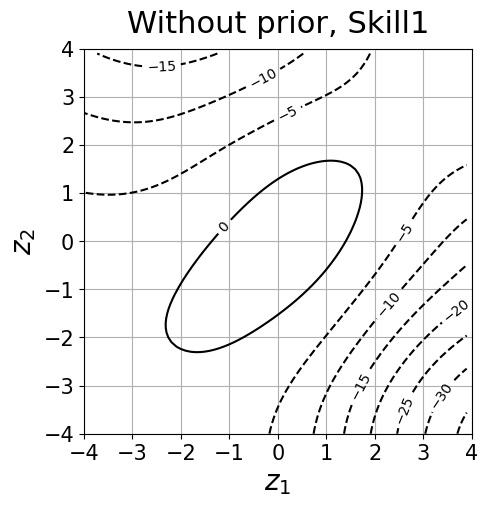

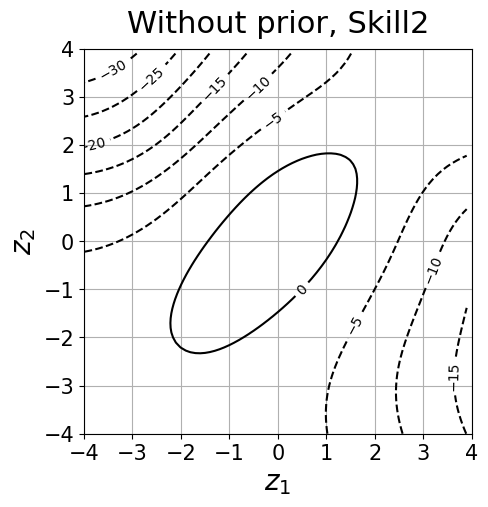

In [9]:
show_expected_grad(with_prior=False)

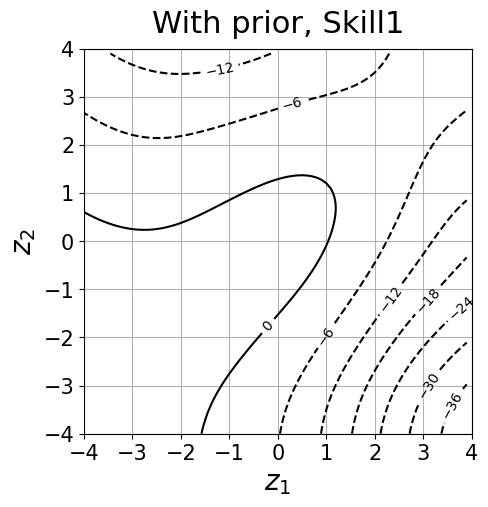

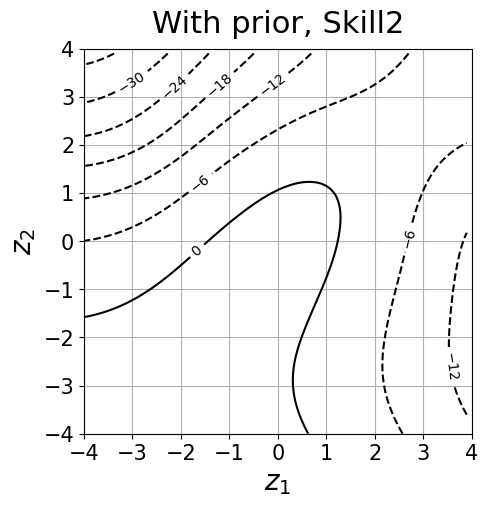

In [10]:
show_expected_grad(with_prior=True)